In [3]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

  0%|          | 0/100 [00:00<?, ?it/s]

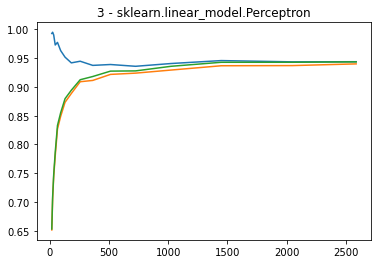

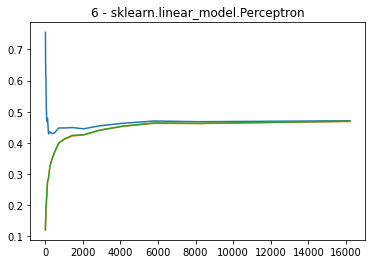

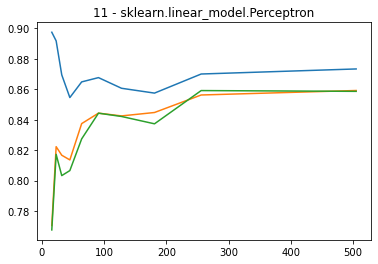

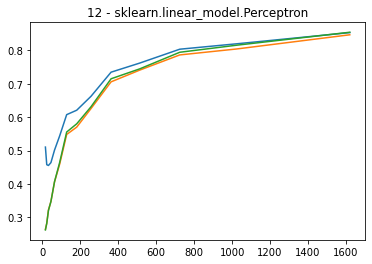

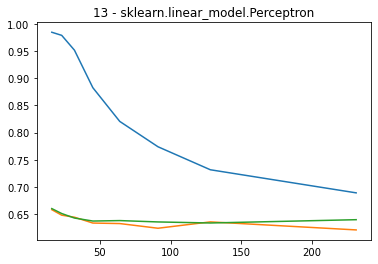

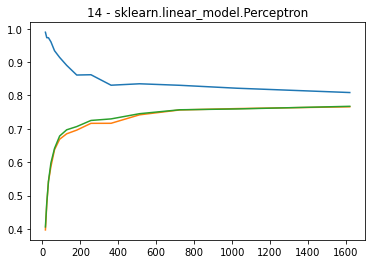

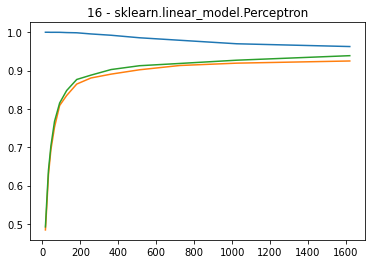

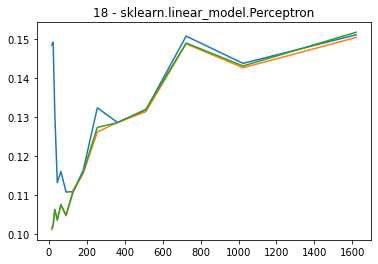

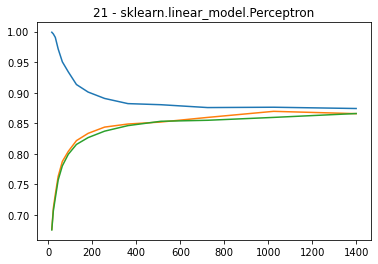

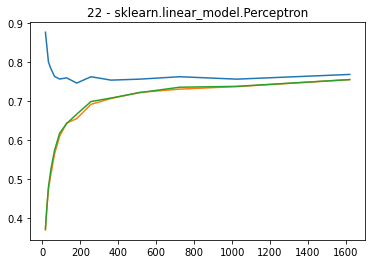

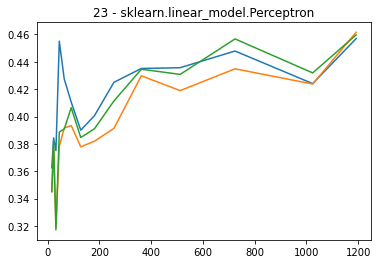

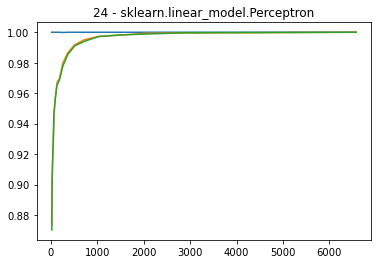

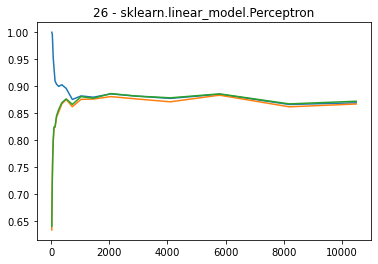

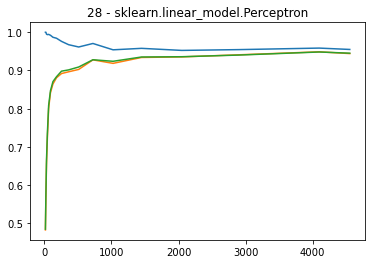

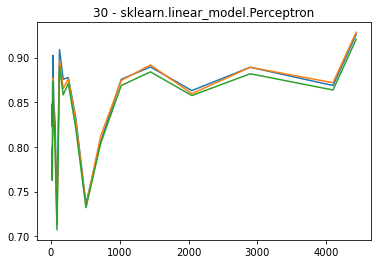

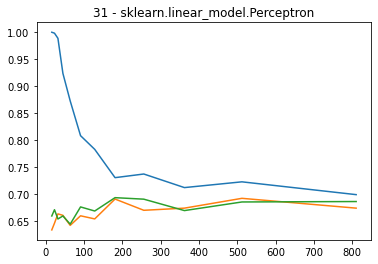

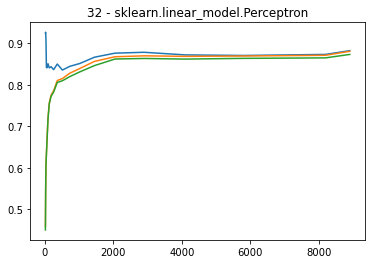

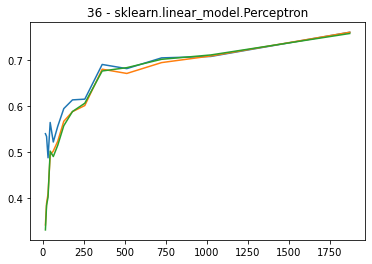

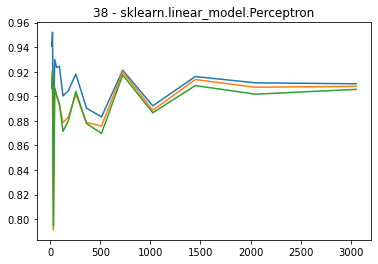

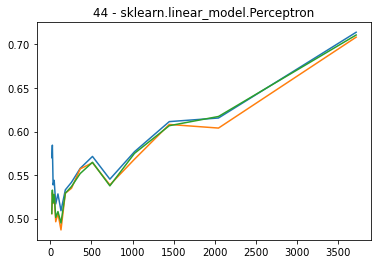

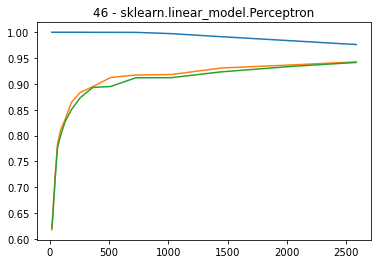

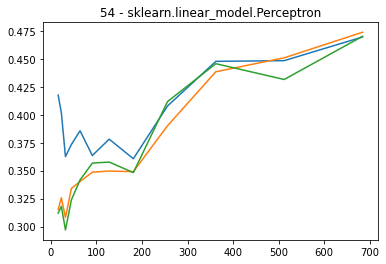

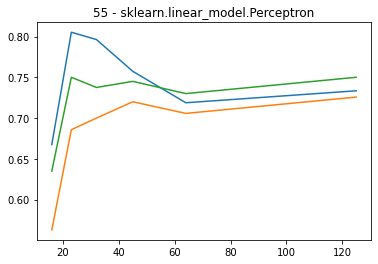

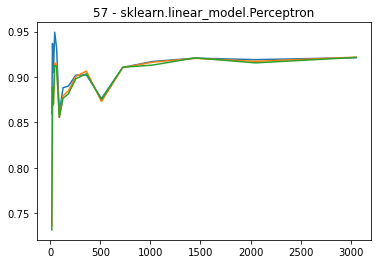

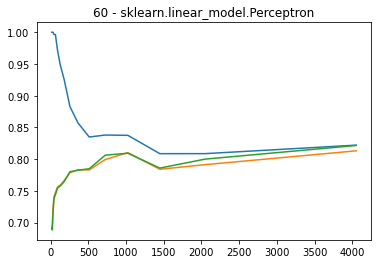

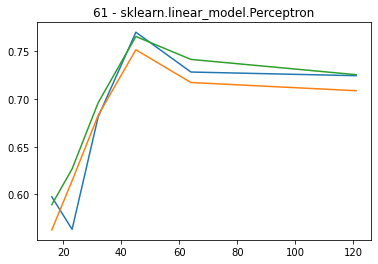

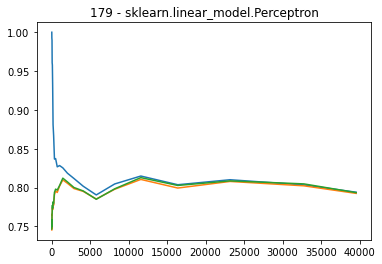

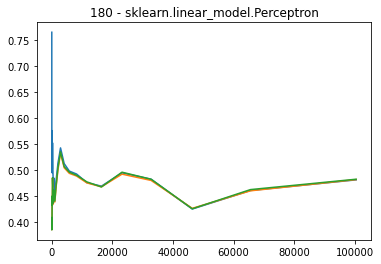

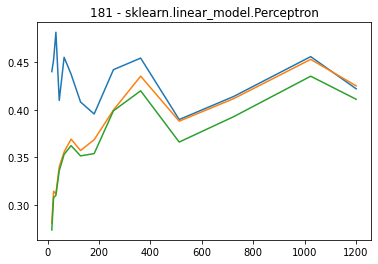

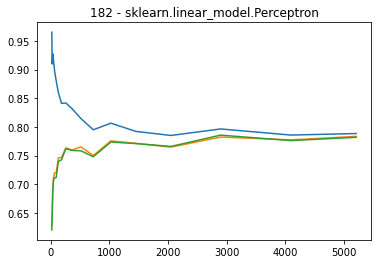

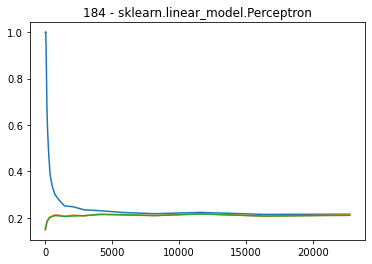

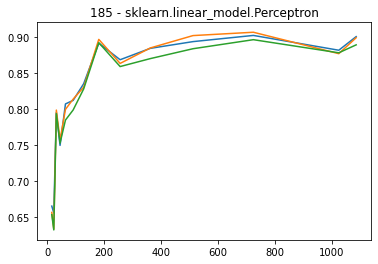

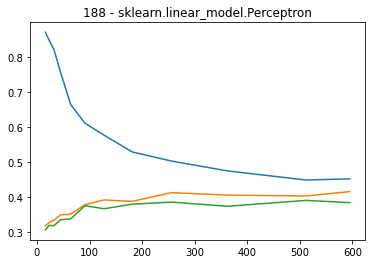

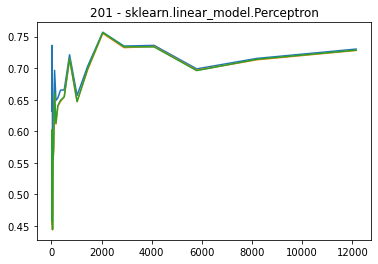

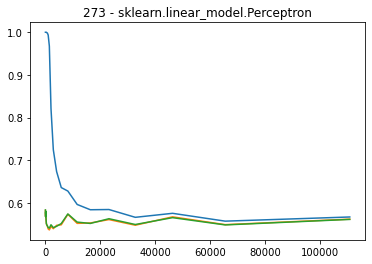

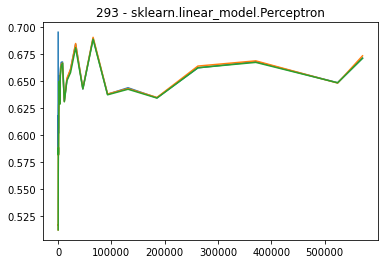

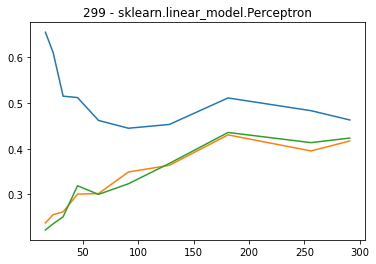

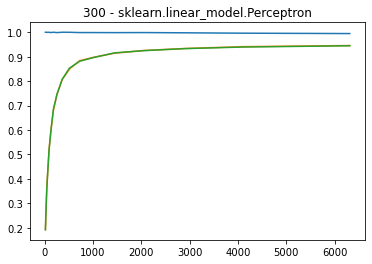

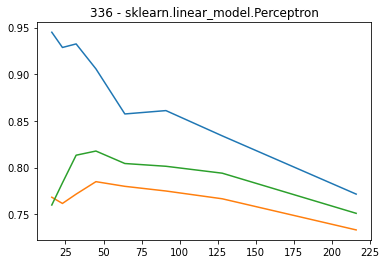

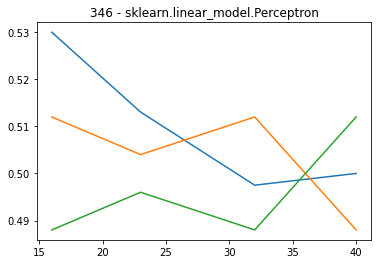

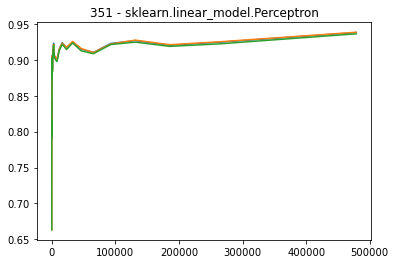

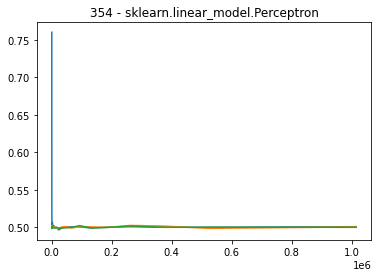

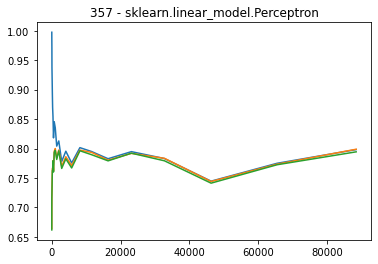

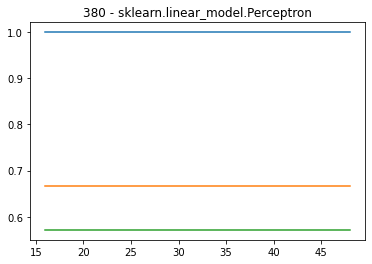

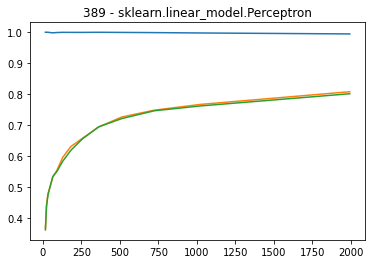

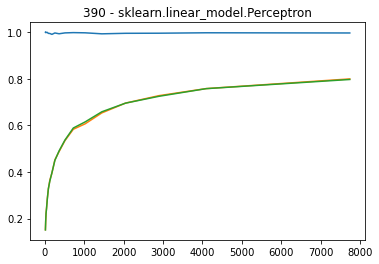

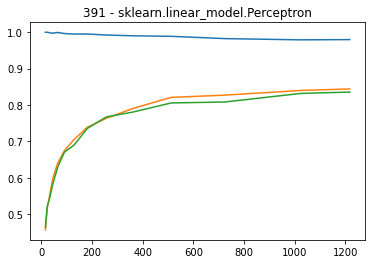

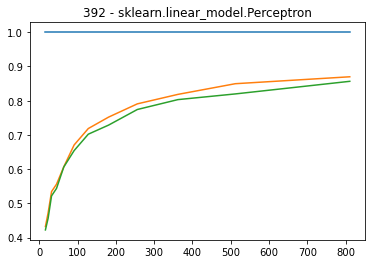

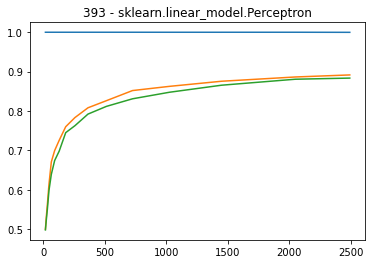

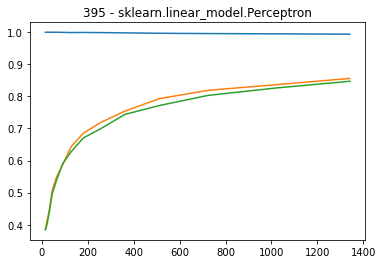

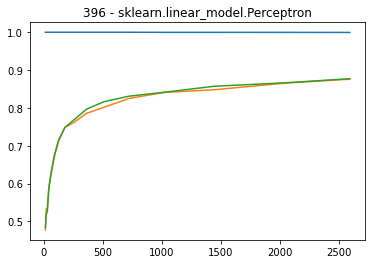

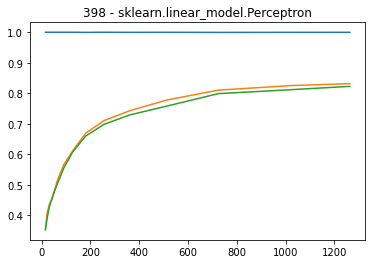

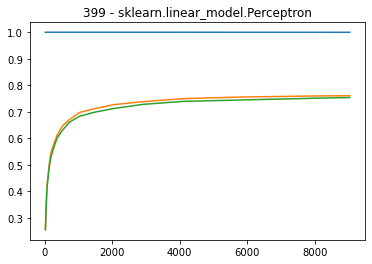

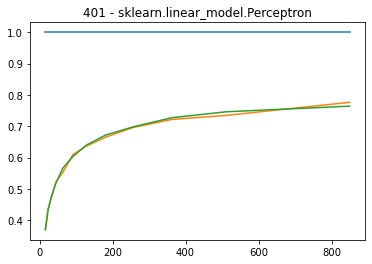

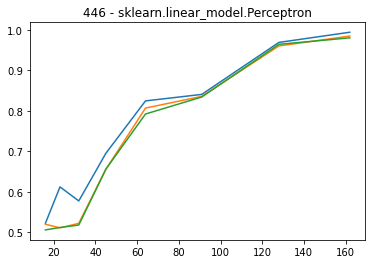

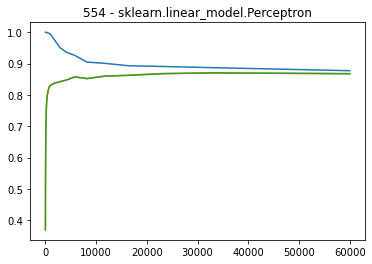

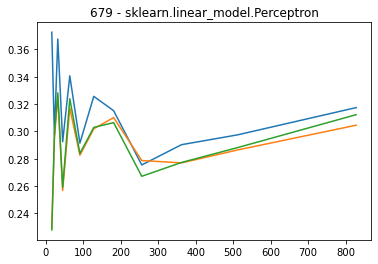

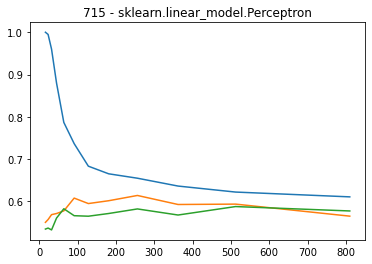

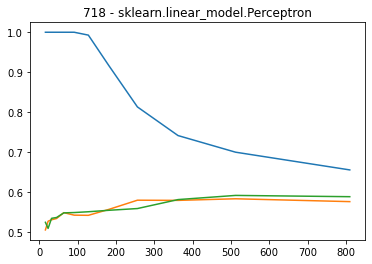

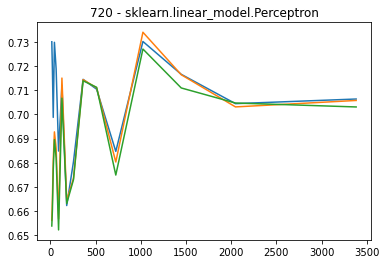

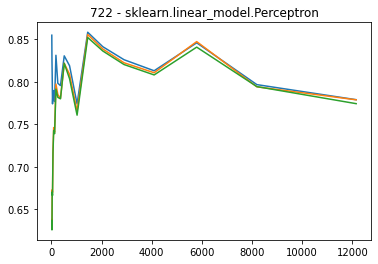

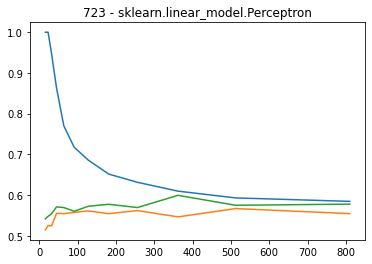

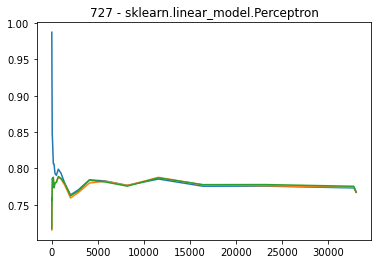

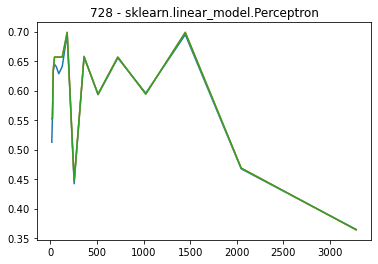

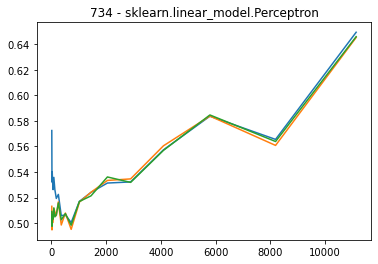

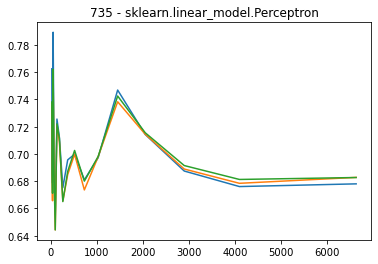

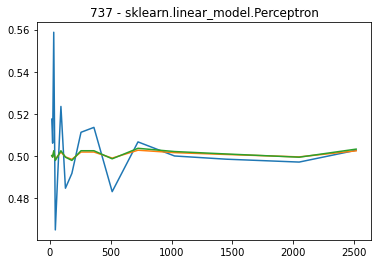

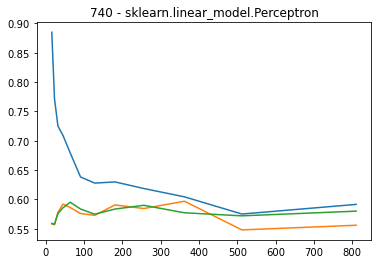

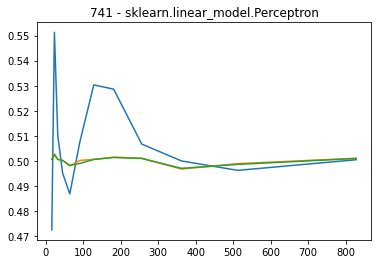

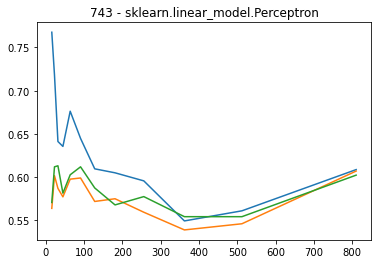

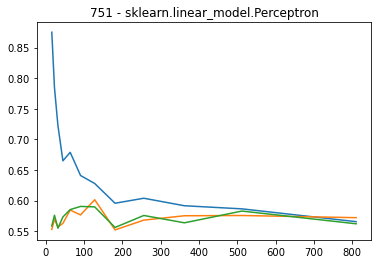

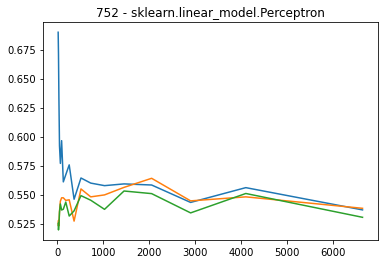

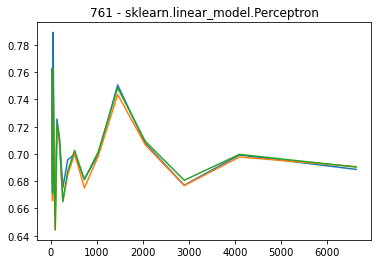

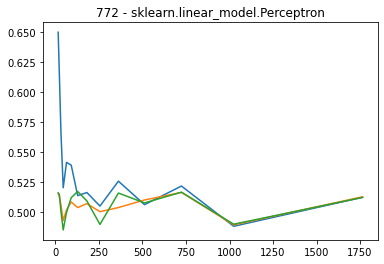

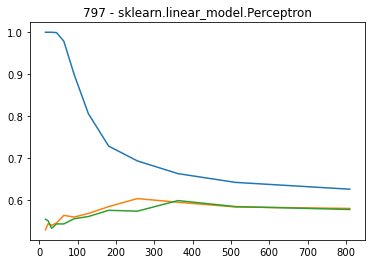

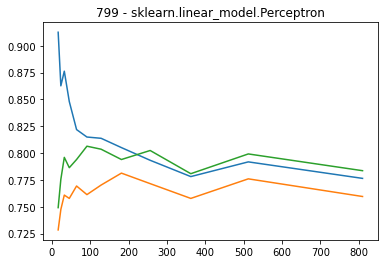

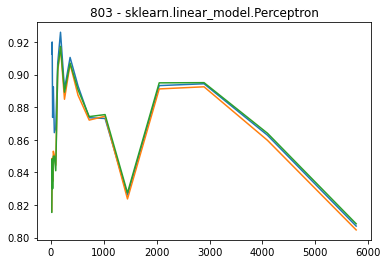

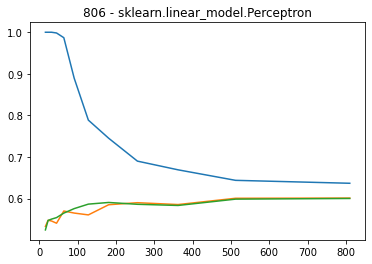

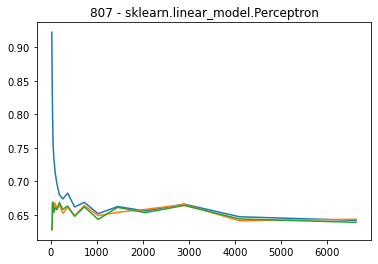

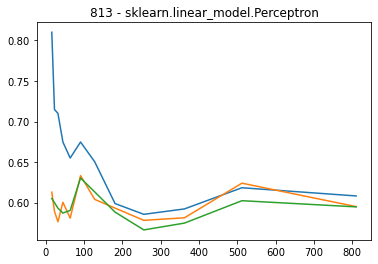

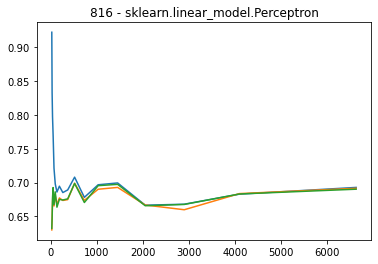

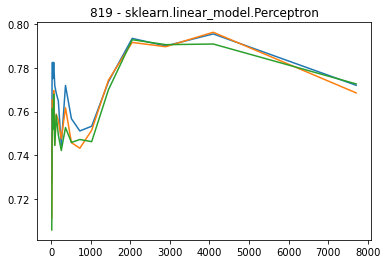

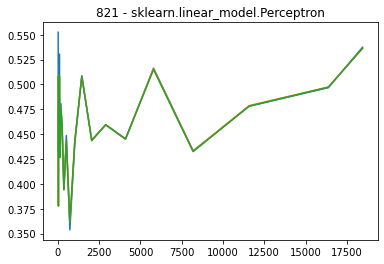

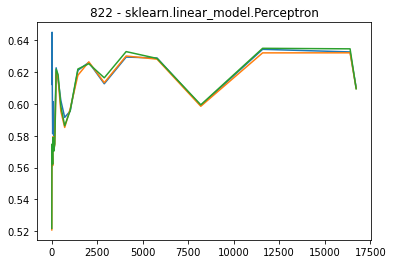

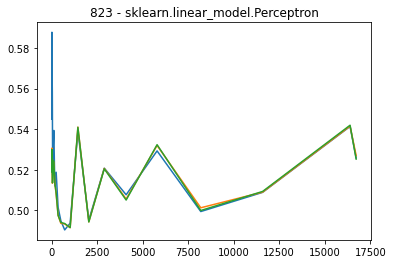

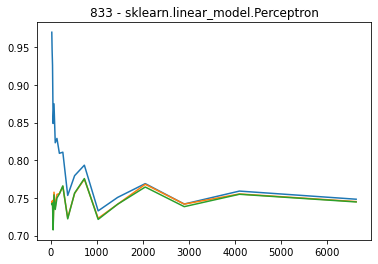

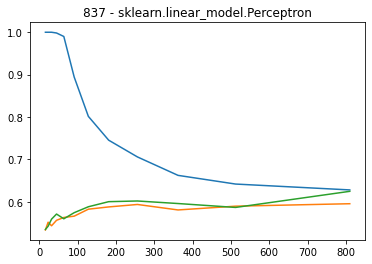

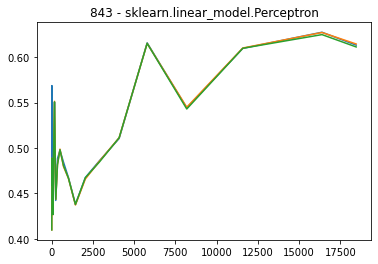

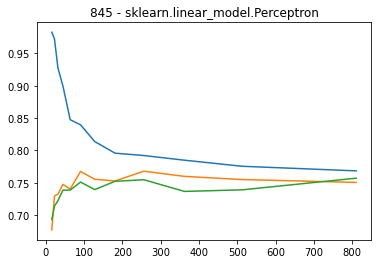

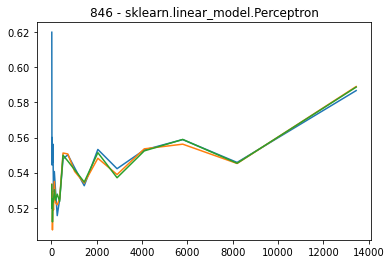

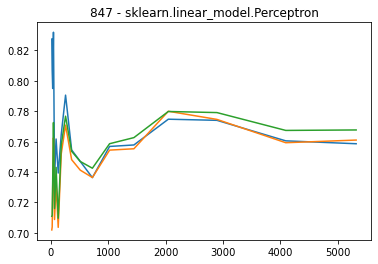

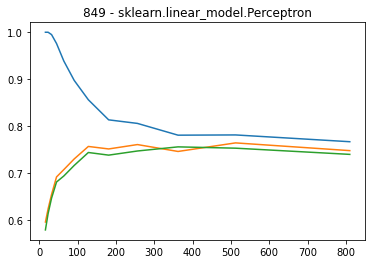

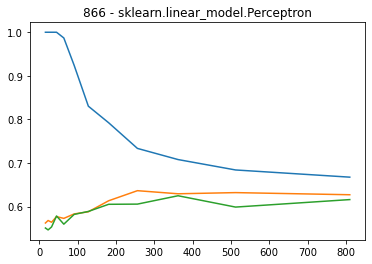

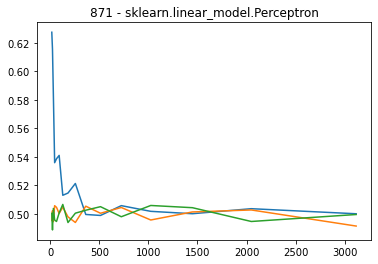

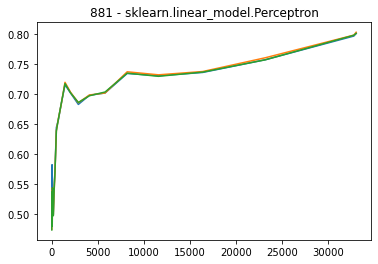

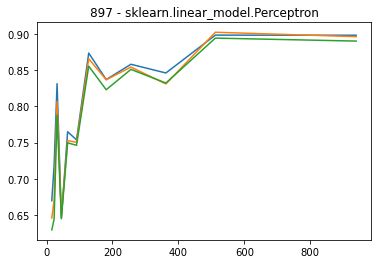

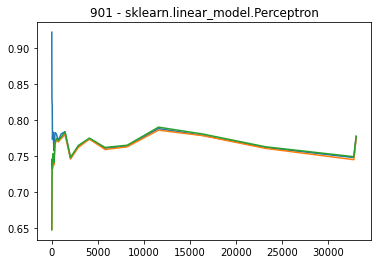

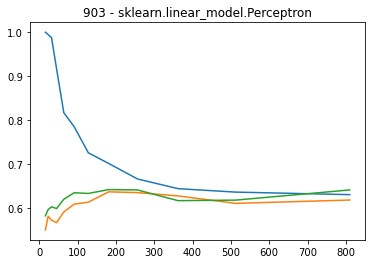

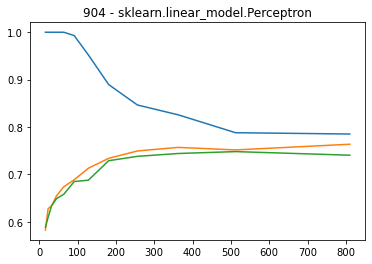

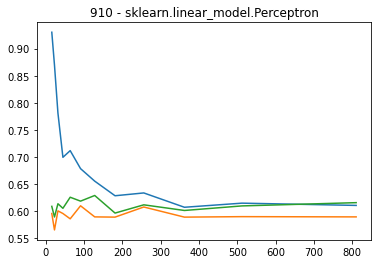

In [241]:
lc_cnt = 0
for openmlid, df_dataset in tqdm(df.groupby("openmlid")):
    for learner, df_learner in df_dataset.groupby("learner"):
    #df_dataset[["size_train", "score_train", "score_valid", "score_test"]]
        sizes = sorted(pd.unique(df_learner["size_train"]))
        
        if learner != "sklearn.linear_model.Perceptron":
            continue
        
        c = [df_learner[df_learner["size_train"] == s]["score_train"] for s in sizes]
        lc_cnt += len(c[0])
        
        if True:
            curve_train = [np.mean(df_learner[df_learner["size_train"] == s]["score_train"]) for s in sizes]
            curve_valid = [np.mean(df_learner[df_learner["size_train"] == s]["score_valid"]) for s in sizes]
            curve_test = [np.mean(df_learner[df_learner["size_train"] == s]["score_test"]) for s in sizes]
   
            fig, ax = plt.subplots()
            ax.plot(sizes, curve_train)
            ax.plot(sizes, curve_valid)
            ax.plot(sizes, curve_test)
            ax.set_title(str(openmlid) + " - " + learner)
            plt.show()

In [4]:
df = pd.read_csv("lcdb.csv")
df.iloc[0:100,:]

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,score_train,score_valid,score_test
0,6,SVC_linear,16,2000,0,0,1.0000,0.1728,0.1840
1,6,SVC_linear,23,2000,0,0,1.0000,0.1939,0.1975
2,6,SVC_linear,32,2000,0,0,1.0000,0.2400,0.2385
3,6,SVC_linear,45,2000,0,0,0.9556,0.2478,0.2515
4,6,SVC_linear,64,2000,0,0,0.9844,0.3150,0.3030
...,...,...,...,...,...,...,...,...,...
95,6,SVC_linear,2896,2000,0,4,0.5735,0.5533,0.5570
96,6,SVC_linear,4096,2000,0,4,0.4888,0.4656,0.4785
97,6,SVC_linear,5793,2000,0,4,0.5294,0.5228,0.5125
98,6,SVC_linear,8192,2000,0,4,0.4688,0.4556,0.4710


In [301]:
[a,b,fun] = get_exp2([0,1,2],[5,1,4])
b = fun(np.array([1,2,3]))
b

<function __main__.get_exp2.<locals>.<lambda>.<locals>.<lambda>(x)>

In [309]:
(1,2)

(1, 2)

In [310]:
import scipy as sp

def get_ipl(sizes, scores):
    def ipl(beta):
        a, b, c = tuple(beta.astype(float))
        pl = lambda x: a - b * x **(-c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(ipl, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a - b * x **(-c)

def get_ipl_no_bias(sizes, scores):
    def ipl_no_bias(beta):
        b, c = tuple(beta.astype(float))
        pl = lambda x: b * x **(-c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    b, c = tuple(sp.optimize.least_squares(ipl_no_bias, np.array([1,1]), method="lm").x)
    return (b, c), lambda x: b * x **(-c)

def get_log2(sizes, scores):
    def log2(beta):
        a, c = tuple(beta.astype(float))
        pl = lambda x: -a * np.log(x) + c
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(log2, np.array([1,1]), method="lm").x)
    return (a, c), lambda x: -a * np.log(x) + c

def get_exp3(sizes, scores):
    def exp3(beta):
        a, b, c = tuple(beta.astype(float))
        pl = lambda x: a * np.exp(-b*x) + c
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(exp3, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a * np.exp(-b*x) + c

def get_exp2(sizes, scores):
    def exp2(beta):
        a, b = tuple(beta.astype(float))
        pl = lambda x: a * np.exp(-b*x)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b = tuple(sp.optimize.least_squares(exp2, np.array([1,1]), method="lm").x)
    return (a, b), lambda x: a * np.exp(-b*x)

def get_lin2(sizes, scores):
    def lin2(beta):
        a, b = tuple(beta.astype(float))
        pl = lambda x: a * x + b
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b = tuple(sp.optimize.least_squares(lin2, np.array([1,1]), method="lm").x)
    return (a, b), lambda x: a*x + b

def get_constant(sizes, scores):
    
    a = scores[-1]
    return a, lambda x:  lambda x: a

def get_vp(sizes, scores):
    def vp(beta):
        a, b, c = tuple(beta.astype(float))
        fun = lambda x: np.exp(a + b/x + c * np.log(x))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(vp, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: np.exp(a + b/x + c * np.log(x))


def get_mmf(sizes, scores):
    def mmf(beta):
        a, b, c, d = tuple(beta.astype(float))
        fun = lambda x: (a * b + c * x ** d)/(b + x ** d)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(mmf, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: (a * b + c * x ** d)/(b + x ** d)

def get_wbl4(sizes, scores):
    def wbl4(beta):
        a, b, c, d = tuple(beta.astype(float))
        fun = lambda x: (c - b * np.exp(-a*(x**d)))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(wbl4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: (c - b * np.exp(-a*(x**d)))

def get_exp4(sizes, scores):
    def exp4(beta):
        a, b, c, d = tuple(beta.astype(float))
        exp4 = lambda x: c - np.exp(-a*(x**d) + b)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(exp4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: c - np.exp(-a*(x**d) + b)

def get_expp3(sizes, scores):
    def expp3(beta):
        a, b, c = tuple(beta.astype(float))
        expp3 = lambda x: c - np.exp((x-b)**a)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(expp3, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: c - np.exp((x-b)**a)


def get_pow4(sizes, scores):
    def pow4(beta):
        a, b, c, d = tuple(beta.astype(float))
        pow4 = lambda x: c - (-a*x + b)**d
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(pow4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: c - (-a*x + b)**d


def get_ilog2(sizes, scores):
    def ilog2(beta):
        a, c = tuple(beta.astype(float))
        ilog2 = lambda x: c - (a/np.log(x))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(ilog2, np.array([1,1]), method="lm").x)
    return (a, c), lambda x: c - (a/np.log(x))

def get_expd3(sizes, scores):
    def expd3(beta):
        a, b, c = tuple(beta.astype(float))
        expd3 = lambda x: c - (c - a)*np.exp(-b*x)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(expd3, np.array([1,1,1,1]), method="lm").x)
    return (a, c), lambda x: c - (c - a)*np.exp(-b*x)

def get_logpower(sizes, scores):
    def logpower(beta):
        a, b, c = tuple(beta.astype(float))
        fun = lambda x: a / (1 + (x / np.exp(b))**c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(logpower, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a / (1 + (x / np.exp(b))**c)

In [255]:
df

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,score_train,score_valid,score_test
0,6,SVC_linear,16,2000,0,0,1.0000,0.1728,0.1840
1,6,SVC_linear,23,2000,0,0,1.0000,0.1939,0.1975
2,6,SVC_linear,32,2000,0,0,1.0000,0.2400,0.2385
3,6,SVC_linear,45,2000,0,0,0.9556,0.2478,0.2515
4,6,SVC_linear,64,2000,0,0,0.9844,0.3150,0.3030
...,...,...,...,...,...,...,...,...,...
1006352,722,sklearn.tree.ExtraTreeClassifier,2896,1500,4,4,1.0000,0.8800,0.8913
1006353,722,sklearn.tree.ExtraTreeClassifier,4096,1500,4,4,1.0000,0.8933,0.8987
1006354,722,sklearn.tree.ExtraTreeClassifier,5793,1500,4,4,1.0000,0.9141,0.9273
1006355,722,sklearn.tree.ExtraTreeClassifier,8192,1500,4,4,1.0000,0.9059,0.8987


In [9]:
import sklearn.metrics

rows = []

pd.set_option('display.max_rows', 100)  # or 1000

for openmlid, df_dataset in df.groupby("openmlid"):
    rows.append([openmlid,(np.max(df_dataset['size_train'].to_numpy()))])

pd.DataFrame(rows,columns=['openmlid','max train size']).sort_values(by='max train size')

,openmlid,max train size
39,346,40
43,380,48
25,61,121
22,55,125
54,446,162
38,336,216
4,13,231
36,299,291
2,11,505
32,188,595


In [249]:
df_ipl

,openmlid,learner,outer_seed,inner_seed,max_anchor_seen,anchor_prediction,score,prediction
0,6,SVC_linear,0,0,45,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1728, 0.1939, 0.24, 0.2478, 0.315, 0.3322, ...","[0.1669, 0.2029, 0.2305, 0.2546, 0.2755, 0.293..."
1,6,SVC_linear,0,0,64,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1728, 0.1939, 0.24, 0.2478, 0.315, 0.3322, ...","[0.1626, 0.1987, 0.2314, 0.2651, 0.2997, 0.334..."
2,6,SVC_linear,0,0,91,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1728, 0.1939, 0.24, 0.2478, 0.315, 0.3322, ...","[0.1626, 0.1987, 0.2314, 0.2651, 0.2997, 0.334..."
3,6,SVC_linear,0,0,128,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1728, 0.1939, 0.24, 0.2478, 0.315, 0.3322, ...","[0.1625, 0.1986, 0.2314, 0.2651, 0.2998, 0.334..."
4,6,SVC_linear,0,0,181,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1728, 0.1939, 0.24, 0.2478, 0.315, 0.3322, ...","[0.1547, 0.1949, 0.2315, 0.2691, 0.3078, 0.346..."
...,...,...,...,...,...,...,...,...
795,6,SVC_linear,1,24,2048,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1717, 0.175, 0.2306, 0.2883, 0.3083, 0.3733...","[0.139, 0.2043, 0.2558, 0.3021, 0.3434, 0.3792..."
796,6,SVC_linear,1,24,2896,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1717, 0.175, 0.2306, 0.2883, 0.3083, 0.3733...","[0.1218, 0.2108, 0.2738, 0.3247, 0.3657, 0.397..."
797,6,SVC_linear,1,24,4096,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1717, 0.175, 0.2306, 0.2883, 0.3083, 0.3733...","[0.1218, 0.2108, 0.2738, 0.3248, 0.3657, 0.397..."
798,6,SVC_linear,1,24,5793,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.1717, 0.175, 0.2306, 0.2883, 0.3083, 0.3733...","[0.1273, 0.2089, 0.2684, 0.318, 0.3591, 0.3919..."


In [269]:
df_small = df[df['openmlid'] == 11]
len(df_small)

24865

In [278]:
len(df_small['size_train'].unique())

10

In [281]:
25*5*10*20

25000

In [280]:
df_small

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,score_train,score_valid,score_test
170950,11,SVC_linear,16,63,0,0,1.0000,0.7368,0.7143
170951,11,SVC_linear,23,63,0,0,1.0000,0.8596,0.7937
170952,11,SVC_linear,32,63,0,0,1.0000,0.8596,0.7778
170953,11,SVC_linear,45,63,0,0,0.9556,0.8596,0.8889
170954,11,SVC_linear,64,63,0,0,0.9219,0.8596,0.8889
...,...,...,...,...,...,...,...,...,...
195810,11,sklearn.tree.ExtraTreeClassifier,91,63,4,24,1.0000,0.6667,0.8413
195811,11,sklearn.tree.ExtraTreeClassifier,128,63,4,24,1.0000,0.6491,0.8254
195812,11,sklearn.tree.ExtraTreeClassifier,181,63,4,24,1.0000,0.6667,0.7460
195813,11,sklearn.tree.ExtraTreeClassifier,256,63,4,24,1.0000,0.7719,0.7619


In [381]:
import sklearn.metrics

model_names    = ['pow3', 'pow2', 'log2', 'exp2', 'exp3' 'lin2', 'baseline_last_constant']
popular_models = [get_ipl, get_ipl_no_bias, get_log2, get_exp2, get_exp3, get_lin2, get_constant]

df = pd.read_csv("lcdb.csv")
df_small = df[df['openmlid'] == 11]
df_small = df_small

def get_extrapolation_predictions_more(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                for i in range(0,len(model_names)):
                    extrapolation_fun = popular_models[i]
                    #print('fitting %s...\n' % model_names[i])
                    for offset in range(4, len(sizes)):
                        beta, model = extrapolation_fun(sizes[:offset], scores[:offset])
                        predictions = np.round(model(sizes), 4)
                        rows.append([openmlid, learner, outer, inner, sizes[offset - 1], predictions, model_names[i], beta])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "max_anchor_seen", "prediction", "curve_model", "beta"])

def get_extrapolation_predictions_info(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                rows.append([openmlid, learner, outer, inner, sizes, scores])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "anchor_prediction", "score"])


In [354]:
df_models

,openmlid,learner,outer_seed,inner_seed,max_anchor_seen,prediction,curve_model,beta
0,11,SVC_linear,0,0,45,"[0.7374, 0.8583, 0.8606, 0.8606, 0.8606, 0.860...",pow3,"(0.860623993356554, 2120265334832.5996, 10.991..."
1,11,SVC_linear,0,0,64,"[0.7373, 0.8584, 0.8604, 0.8605, 0.8605, 0.860...",pow3,"(0.860461025621901, 4231682484964.645, 11.2414..."
2,11,SVC_linear,0,0,91,"[0.7389, 0.8523, 0.8529, 0.8529, 0.8529, 0.852...",pow3,"(0.8529423531321395, 1.5887583558997214e+16, 1..."
3,11,SVC_linear,0,0,128,"[0.7383, 0.8514, 0.8519, 0.8519, 0.8519, 0.851...",pow3,"(0.8519386452313842, 4.108471819709431e+16, 14..."
4,11,SVC_linear,0,0,181,"[0.7387, 0.8508, 0.8513, 0.8513, 0.8513, 0.851...",pow3,"(0.8513400964814366, 6.9779894353697816e+16, 1..."
...,...,...,...,...,...,...,...,...
89185,11,sklearn.tree.ExtraTreeClassifier,4,24,64,"[0.6515, 0.6633, 0.6784, 0.7003, 0.7323, 0.777...",baseline_last_constant,"(0.0016834104532383479, 0.624571770686673)"
89186,11,sklearn.tree.ExtraTreeClassifier,4,24,91,"[0.657, 0.6635, 0.6718, 0.6837, 0.7012, 0.7261...",baseline_last_constant,"(0.0009201283472435576, 0.6423229482229559)"
89187,11,sklearn.tree.ExtraTreeClassifier,4,24,128,"[0.6616, 0.6644, 0.6679, 0.673, 0.6805, 0.6911...",baseline_last_constant,"(0.0003929691170908876, 0.655339075490294)"
89188,11,sklearn.tree.ExtraTreeClassifier,4,24,181,"[0.6629, 0.6648, 0.6673, 0.6709, 0.6761, 0.683...",baseline_last_constant,"(0.00027564466240244644, 0.6584628315847485)"


In [367]:
import sklearn.metrics

def get_anchors(openmlid):
    df = pd.read_csv("lcdb.csv")
    df = df[df['openmlid']==11]
    row = df[0]
    row["size_train"].values
    
def get_scores(openmlid,learner):
    df = pd.read_csv("lcdb.csv")
    df = df[df['openmlid'==openmlid]]
    df = df[df['learner'==learner]]
    row = df[0]
    row["score_valid"].values
    

def get_extrapolation_predictions(df, extrapolation_fun):
    rows = []
    rows_info = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                for offset in range(4, len(sizes)):
                    model = extrapolation_fun(sizes[:offset], scores[:offset])[-1]
                    predictions = np.round(model(sizes), 4)
                    rows.append([openmlid, learner, outer, inner, sizes[offset - 1], sizes, scores, predictions])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "max_anchor_seen","anchor_prediction", "score", "prediction"])

In [344]:
df

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,score_train,score_valid,score_test
194565,11,sklearn.tree.ExtraTreeClassifier,16,63,0,0,1.0,0.5614,0.6190
194566,11,sklearn.tree.ExtraTreeClassifier,23,63,0,0,1.0,0.7193,0.7302
194567,11,sklearn.tree.ExtraTreeClassifier,32,63,0,0,1.0,0.6667,0.6825
194568,11,sklearn.tree.ExtraTreeClassifier,45,63,0,0,1.0,0.6842,0.7143
194569,11,sklearn.tree.ExtraTreeClassifier,64,63,0,0,1.0,0.6842,0.6508
...,...,...,...,...,...,...,...,...,...
195810,11,sklearn.tree.ExtraTreeClassifier,91,63,4,24,1.0,0.6667,0.8413
195811,11,sklearn.tree.ExtraTreeClassifier,128,63,4,24,1.0,0.6491,0.8254
195812,11,sklearn.tree.ExtraTreeClassifier,181,63,4,24,1.0,0.6667,0.7460
195813,11,sklearn.tree.ExtraTreeClassifier,256,63,4,24,1.0,0.7719,0.7619


In [421]:
openmlid = 11
learner = 'sklearn.tree.ExtraTreeClassifier'
inner_seed = 0
outer_seed = 0

def get_info(df_info, openmlid, learner, outer_seed, inner_seed):
    q = df_info.query('openmlid==@openmlid and learner==@learner and outer_seed==@outer_seed and inner_seed == @inner_seed')
    q = q.iloc[0,:]
    return [q.anchor_prediction, q.score]


In [420]:

q = df_info.query('openmlid==@openmlid and learner==@learner and outer_seed==@outer_seed and inner_seed == @inner_seed')
#q = q[0]
return [q.anchor_prediction, q.score]
q = q.iloc[0,:]
q

openmlid                                                            11
learner                               sklearn.tree.ExtraTreeClassifier
outer_seed                                                           0
inner_seed                                                           0
anchor_prediction         [16, 23, 32, 45, 64, 91, 128, 181, 256, 505]
score                [0.5614, 0.7193, 0.6667, 0.6842, 0.6842, 0.824...
Name: 2375, dtype: object

In [413]:
df_info

,openmlid,learner,outer_seed,inner_seed,anchor_prediction,score
0,11,SVC_linear,0,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.7368, 0.8596, 0.8596, 0.8596, 0.8596, 0.842..."
1,11,SVC_linear,1,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.8596, 0.8421, 0.8596, 0.8596, 0.8596, 0.859..."
2,11,SVC_linear,2,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.8596, 0.8421, 0.8772, 0.8772, 0.8596, 0.877..."
3,11,SVC_linear,3,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.807, 0.8246, 0.8596, 0.8772, 0.8596, 0.8772..."
4,11,SVC_linear,4,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.9123, 0.9123, 0.9123, 0.9123, 0.8947, 0.894..."
...,...,...,...,...,...,...
2495,11,sklearn.tree.ExtraTreeClassifier,0,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.4035, 0.7193, 0.7018, 0.7018, 0.6842, 0.666..."
2496,11,sklearn.tree.ExtraTreeClassifier,1,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.7368, 0.7193, 0.7544, 0.5965, 0.7368, 0.789..."
2497,11,sklearn.tree.ExtraTreeClassifier,2,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.6316, 0.614, 0.6491, 0.6842, 0.7193, 0.8246..."
2498,11,sklearn.tree.ExtraTreeClassifier,3,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.6667, 0.6667, 0.5789, 0.6667, 0.7018, 0.666..."


In [412]:
df_info.query('openmlid==@openmlid and learner==@learner and outer_seed==@outer_seed and inner_seed == @inner_seed')

,openmlid,learner,outer_seed,inner_seed,anchor_prediction,score
2375,11,sklearn.tree.ExtraTreeClassifier,0,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.5614, 0.7193, 0.6667, 0.6842, 0.6842, 0.824..."


In [404]:
df_info.query('openmlid'==11)

ValueError: expr must be a string to be evaluated, <class 'bool'> given

In [415]:
get_info(df_info,11,'sklearn.tree.ExtraTreeClassifier',0,0)

KeyError: 0

In [399]:
get_info(df_info,11,'sklearn.tree.ExtraTreeClassifier',0,0)


ValueError: expr must be a string to be evaluated, <class 'bool'> given

In [96]:
df_ipl = get_extrapolation_predictions(df.iloc[0:1000,:], get_ipl)
df_vp = get_extrapolation_predictions(df.iloc[0:1000,:], get_vp)
df_mmf = get_extrapolation_predictions(df.iloc[0:1000,:], get_mmf)
df_logpower = get_extrapolation_predictions(df.iloc[0:1000,:], get_logpower)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
df_models = get_extrapolation_predictions_more(df_small)

In [388]:
df_info = get_extrapolation_predictions_info(df_small)
df_info

  0%|          | 0/2500 [00:00<?, ?it/s]

,openmlid,learner,outer_seed,inner_seed,anchor_prediction,score
0,11,SVC_linear,0,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.7368, 0.8596, 0.8596, 0.8596, 0.8596, 0.842..."
1,11,SVC_linear,1,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.8596, 0.8421, 0.8596, 0.8596, 0.8596, 0.859..."
2,11,SVC_linear,2,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.8596, 0.8421, 0.8772, 0.8772, 0.8596, 0.877..."
3,11,SVC_linear,3,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.807, 0.8246, 0.8596, 0.8772, 0.8596, 0.8772..."
4,11,SVC_linear,4,0,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.9123, 0.9123, 0.9123, 0.9123, 0.8947, 0.894..."
...,...,...,...,...,...,...
2495,11,sklearn.tree.ExtraTreeClassifier,0,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.4035, 0.7193, 0.7018, 0.7018, 0.6842, 0.666..."
2496,11,sklearn.tree.ExtraTreeClassifier,1,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.7368, 0.7193, 0.7544, 0.5965, 0.7368, 0.789..."
2497,11,sklearn.tree.ExtraTreeClassifier,2,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.6316, 0.614, 0.6491, 0.6842, 0.7193, 0.8246..."
2498,11,sklearn.tree.ExtraTreeClassifier,3,24,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 505]","[0.6667, 0.6667, 0.5789, 0.6667, 0.7018, 0.666..."


In [365]:
row = df_ipl.iloc[0]

def compute_metrics_per_row(row):

    max_anchor_seen = row.max_anchor_seen
    score = row.score
    prediction = row.prediction
    anchor_prediction = row.anchor_prediction
    max_anchor = np.max(anchor_prediction)
    percentage_train = np.round(max_anchor_seen/max_anchor*100)/100

    trn_ind = np.argwhere(max_anchor_seen == anchor_prediction)[0][0] # recover offset
    trn_indices = range(0,(trn_ind+1))
    tst_indices = range(trn_ind+1,len(anchor_prediction))
    n_trn = len(trn_indices)

    y_trn_hat = prediction[trn_indices]
    y_trn = score[trn_indices]
    y_tst_hat = prediction[tst_indices]
    y_tst = score[tst_indices]

    MSE_trn = sklearn.metrics.mean_squared_error([y_trn], [y_trn_hat])
    MSE_tst = sklearn.metrics.mean_squared_error([y_tst], [y_tst_hat])
    MSE_tst_last = sklearn.metrics.mean_squared_error([y_tst[-1]],[y_tst_hat[-1]])
    L1_trn = sklearn.metrics.mean_absolute_error([y_trn], [y_trn_hat])
    L1_tst = sklearn.metrics.mean_absolute_error([y_tst], [y_tst_hat])
    L1_tst_last = sklearn.metrics.mean_absolute_error([y_tst[-1]],[y_tst_hat[-1]])
    
    return [MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,max_anchor_seen,percentage_train,n_trn]

In [446]:
row = df_ipl.iloc[0]

df_models

def compute_metrics_per_row_more(row, anchor_prediction, score):
    
    max_anchor_seen = row.max_anchor_seen
    prediction = row.prediction
    max_anchor = np.max(anchor_prediction)
    percentage_train = np.round(max_anchor_seen/max_anchor*100)/100

    trn_ind = np.argwhere(max_anchor_seen == anchor_prediction)[0][0] # recover offset
    trn_indices = range(0,(trn_ind+1))
    tst_indices = range(trn_ind+1,len(anchor_prediction))
    n_trn = len(trn_indices)

    y_trn_hat = prediction[trn_indices]
    y_trn = score[trn_indices]
    y_tst_hat = prediction[tst_indices]
    y_tst = score[tst_indices]

    MSE_trn = sklearn.metrics.mean_squared_error([y_trn], [y_trn_hat])
    MSE_tst = sklearn.metrics.mean_squared_error([y_tst], [y_tst_hat])
    MSE_tst_last = sklearn.metrics.mean_squared_error([y_tst[-1]],[y_tst_hat[-1]])
    L1_trn = sklearn.metrics.mean_absolute_error([y_trn], [y_trn_hat])
    L1_tst = sklearn.metrics.mean_absolute_error([y_tst], [y_tst_hat])
    L1_tst_last = sklearn.metrics.mean_absolute_error([y_tst[-1]],[y_tst_hat[-1]])
    
    return [MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,max_anchor_seen,percentage_train,n_trn,row.curve_model]

In [445]:
anchor_prediction

array([0.7368, 0.8596, 0.8596, 0.8596, 0.8596, 0.8421, 0.8421, 0.8421,
       0.8421, 0.8421])

In [447]:
row = df_models.iloc[0,:]
score, anchor_prediction = get_info(df_info, row.openmlid, row.learner, row.outer_seed, row.inner_seed)
compute_metrics_per_row_more(row,score,anchor_prediction)


[1.0125000000000657e-06,
 0.00028537500000000226,
 0.00034225000000000265,
 0.0009750000000000314,
 0.015583333333333393,
 0.018500000000000072,
 45,
 0.09,
 4,
 'pow3']

In [439]:
row = df_models.iloc[0,:]
score, anchor_prediction = get_info(df_info, row.openmlid, row.learner, row.outer_seed, row.inner_seed)
rows_metrics.append(compute_metrics_per_row_more(row,score,anchor_prediction))

max_anchor_seen = row.max_anchor_seen
prediction = row.prediction
max_anchor = np.max(anchor_prediction)
percentage_train = np.round(max_anchor_seen/max_anchor*100)/100

trn_ind = np.argwhere(max_anchor_seen == anchor_prediction)[0][0] # recover offset
trn_indices = range(0,(trn_ind+1))
tst_indices = range(trn_ind+1,len(anchor_prediction))
n_trn = len(trn_indices)

y_trn_hat = prediction[trn_indices]
y_trn = score[trn_indices]
y_tst_hat = prediction[tst_indices]
y_tst = score[tst_indices]

MSE_trn = sklearn.metrics.mean_squared_error([y_trn], [y_trn_hat])
MSE_tst = sklearn.metrics.mean_squared_error([y_tst], [y_tst_hat])
MSE_tst_last = sklearn.metrics.mean_squared_error([y_tst[-1]],[y_tst_hat[-1]])
L1_trn = sklearn.metrics.mean_absolute_error([y_trn], [y_trn_hat])
L1_tst = sklearn.metrics.mean_absolute_error([y_tst], [y_tst_hat])
L1_tst_last = sklearn.metrics.mean_absolute_error([y_tst[-1]],[y_tst_hat[-1]])


IndexError: index 0 is out of bounds for axis 0 with size 0

In [360]:
compute_metrics_per_row_more

<function __main__.compute_metrics_per_row_more(row)>

In [373]:
def compute_metrics_df(d):
    pbar = tqdm(total=len(df))
    rows_metrics = []
    for i in range(0,len(df)):
        row = df.iloc[i,:]
        row_original = df_original.iloc[i,:]
    
        rows_metrics.append(compute_metrics_per_row(row))
        pbar.update(1)
    pbar.close()
    rows_metrics = np.array(rows_metrics)
    df_metrics = pd.DataFrame(rows_metrics,columns=['MSE trn','MSE tst','MSE tst last','L1 trn','L1 tst','L1 tst last','max anchor seen','percentage','n'])
    return df_metrics


In [466]:
row = df_models.iloc[0,:]
score, anchor_prediction = get_info(df_info, row.openmlid, row.learner, row.outer_seed, row.inner_seed)
newrow = compute_metrics_per_row_more(row,score,anchor_prediction)
np.array(newrow)

array(['1.0125000000000657e-06', '0.00028537500000000226',
       '0.00034225000000000265', '0.0009750000000000314',
       '0.015583333333333393', '0.018500000000000072', '45', '0.09', '4',
       'pow3'], dtype='<U32')

In [467]:
def compute_metrics_df_more(df,df_info):
    pbar = tqdm(total=len(df))
    rows_metrics = []
    for i in range(0,len(df)):
        row = df.iloc[i,:]
        score, anchor_prediction = get_info(df_info, row.openmlid, row.learner, row.outer_seed, row.inner_seed)
        rows_metrics.append(compute_metrics_per_row_more(row,score,anchor_prediction))
        pbar.update(1)
    pbar.close()
    df_metrics = pd.DataFrame(rows_metrics,columns=['MSE trn','MSE tst','MSE tst last','L1 trn','L1 tst','L1 tst last','max anchor seen','percentage','n','curve_model'])
    return df_metrics


In [468]:
df_models_metrics = compute_metrics_df_more(df_models,df_info)

  0%|          | 0/89190 [00:00<?, ?it/s]

C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\sklearn\metrics\_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\sklearn\metrics\_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


In [461]:
df_models_metrics.describe()

,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n,curve_model
count,89190,89190,89190,89190,89190,89190,89190,89190,89190,89190
unique,74522,70135,19920,47002,49393,19920,6,6,6,6
top,0.0,0.0,0.0,0.0,0.0,0.0,181,0.36,4,pow3
freq,6848,4546,4652,6848,4546,4652,15000,15000,15000,14865


In [234]:
metrics_ipl = compute_metrics_df(df_ipl)
metrics_vp = compute_metrics_df(df_vp)
metrics_mmf = compute_metrics_df(df_mmf)
metrics_logpower = compute_metrics_df(df_logpower)

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

In [459]:
df_models_metrics

,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n,curve_model
0,1.0125000000000657e-06,0.00028537500000000226,0.00034225000000000265,0.0009750000000000314,0.015583333333333393,0.018500000000000072,45,0.09,4,pow3
1,7.899999999999948e-07,0.00033856000000000305,0.00033856000000000305,0.0008599999999999941,0.018400000000000083,0.018400000000000083,64,0.13,5,pow3
2,5.150166666666724e-05,0.00011664000000000069,0.00011664000000000069,0.006716666666666704,0.010800000000000032,0.010800000000000032,91,0.18,6,pow3
3,6.277714285714323e-05,9.604000000000062e-05,9.60400000000006e-05,0.007485714285714302,0.009800000000000031,0.009800000000000031,128,0.25,7,pow3
4,6.77050000000005e-05,8.463999999999975e-05,8.463999999999975e-05,0.007900000000000032,0.009199999999999986,0.009199999999999986,181,0.36,8,pow3
...,...,...,...,...,...,...,...,...,...,...
89185,0.006483577999999997,0.14340116600000002,0.51883209,0.07533999999999999,0.31370000000000003,0.7202999999999999,64,0.13,5,baseline_last_constant
89186,0.0060508983333333365,0.042026150000000005,0.12432676000000002,0.07225000000000004,0.17795,0.3526,91,0.18,6,baseline_last_constant
89187,0.005457891428571426,0.004570800000000006,0.009880360000000008,0.06465714285714286,0.05840000000000004,0.09940000000000004,128,0.25,7,baseline_last_constant
89188,0.0048628900000000025,0.0018576500000000024,0.0018748900000000004,0.059250000000000025,0.04310000000000003,0.043300000000000005,181,0.36,8,baseline_last_constant


In [453]:
selected = metrics_ipl[metrics_ipl['n']<15]
a = selected.groupby('n')['L1 tst last'].median()
a.plot()
plt.xlabel('anchors seen')
plt.ylabel('median MSE')
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

(0.0, 0.5)

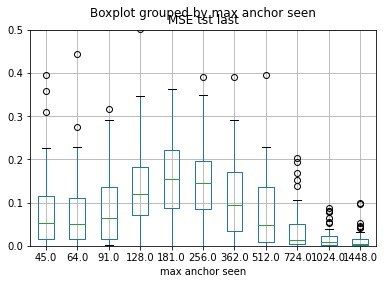

In [196]:
selected = metrics_ipl[metrics_ipl['max anchor seen']<2000]
selected.boxplot(column='MSE tst last',by='max anchor seen')
plt.ylim([0,0.5])

(0.0, 0.04)

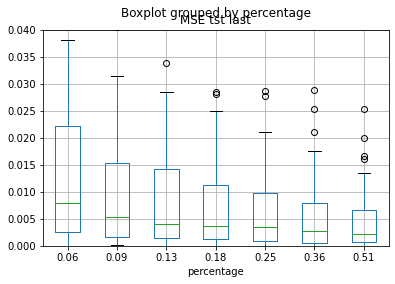

In [217]:
selected = metrics_ipl[metrics_ipl.percentage>0.05]
selected.boxplot(column='MSE tst last',by='percentage')
plt.ylim([0,0.04])


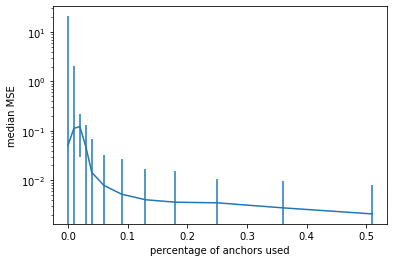

In [230]:
selected = metrics_ipl[metrics_ipl.percentage>-1]
Y = selected.groupby('percentage')['MSE tst last'].median()
Y_sigma = selected.groupby('percentage')['MSE tst last'].std()
X = selected.groupby('percentage')['MSE tst last'].median().index

plt.errorbar(X,Y,yerr=Y_sigma)
plt.xlabel('percentage of anchors used')
plt.ylabel('median MSE')
plt.gca().set_yscale("log")

plt.show()

In [93]:
from scipy.stats import friedmanchisquare, wilcoxon

m = 'L1 tst'
f_test = friedmanchisquare(metrics_ipl[m],metrics_vp[m],metrics_mmf[m],metrics_logpower[m])
wilcoxon(metrics_ipl[m],metrics_vp[m])


WilcoxonResult(statistic=24801.0, pvalue=2.8593076265077136e-95)

In [239]:
from scipy import stats


In [108]:
#df_1["error"] = [sklearn.metrics.mean_squared_error([y_true], [y_hat]) for y_true, y_hat in zip(df_1["score"], df_1["prediction"])]
df_ipl.to_csv("fit_results_ipl_3.csv", index=False, sep=";")

In [109]:
df_vp = get_extrapolation_predictions(df.query("inner_seed < 5"), get_vp)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [110]:
df_vp.to_csv("fit_results_vp.csv", index=False, sep=";")

In [112]:
df_mmf = get_extrapolation_predictions(df.query("inner_seed < 5"), get_mmf)

  0%|          | 0/50000 [00:00<?, ?it/s]

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in power
/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in power
/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [125]:
def get_monotonicity_violations(df, is_increasing):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                violation = 0
                for i, (a1, s1) in enumerate(zip(sizes[:-1], scores[:-1])):
                    a2 = sizes[i + 1]
                    s2 = scores[i + 1]
                    violation += max(0, s1 - s2)
                rows.append([openmlid, learner, outer, inner, violation])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "total_violation"])

def get_monotonicities(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                for i, (a1, s1) in enumerate(zip(sizes[:-2], scores[:-2])):
                    a2 = sizes[i + 2]
                    s2 = scores[i + 2]
                    A = np.vstack([[a1, a2], np.ones(2)]).T
                    m, c = np.linalg.lstsq(A, [s1, s2])[0]
                    required_for_convexity = m * sizes[i+1] + c
                    seen = scores[i+1]
                    print(seen > required_for_convexity)
                    
                    
                #    rows.append([openmlid, learner, outer, inner, sizes[offset - 1], sizes, scores, predictions])
                pbar.update(1)
    pbar.close()
    
df_violations = get_monotonicity_violations(df, True)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [126]:
df_violations[df_violations["total_violation"] < ]

,openmlid,learner,outer_seed,inner_seed,total_violation
0,3,SVC_linear,0,0,0.0139
1,3,SVC_linear,1,0,0.0383
2,3,SVC_linear,2,0,0.0417
3,3,SVC_linear,3,0,0.0070
4,3,SVC_linear,4,0,0.0243
...,...,...,...,...,...
66692,910,sklearn.tree.ExtraTreeClassifier,0,4,0.4224
66693,910,sklearn.tree.ExtraTreeClassifier,1,4,0.3779
66694,910,sklearn.tree.ExtraTreeClassifier,2,4,0.4334
66695,910,sklearn.tree.ExtraTreeClassifier,3,4,0.2777


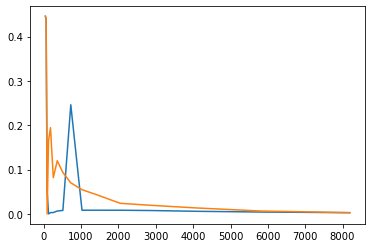

In [79]:
fig, ax = plt.subplots()
ax.plot(df_1["max_anchor_seen"], df_1["error"])
ax.plot(df_2["max_anchor_seen"], df_2["error"])